# Data Science and Business Analytics (GRIP June 2021)

# Task 3 : Exploratory Data Analysis - Retail

# Author : Paras Nitin Shah

# Problem Statement : Perform 'Exploratory Data Analysis' on dataset 'SampleSuperstore' and try to find out the weak areas where you can work to make more profit.

In [1]:
#Importing the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the data into a data frame and reading the data.
dataset = pd.read_csv("SampleSuperstore.csv")
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
dataset.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
dataset.count()

Ship Mode       9994
Segment         9994
Country         9994
City            9994
State           9994
Postal Code     9994
Region          9994
Category        9994
Sub-Category    9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64

In [7]:
dataset.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [8]:
#Removing null values and duplicates if any.
dataset.shape

(9994, 13)

In [9]:
dataset = dataset.dropna()
dataset.shape

(9994, 13)

In [10]:
dataset = dataset.drop_duplicates()
dataset.shape

(9977, 13)

## Exploratory Data Analysis (EDA) and Data Visualization

In [11]:
#Checking the products sold from the store based on the category of products.
dataset['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

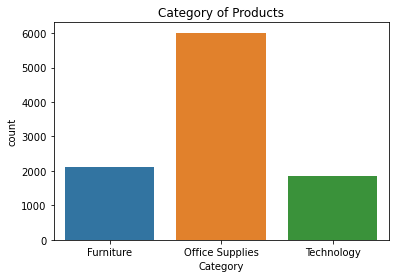

In [12]:
sns.countplot(x=dataset['Category'])
plt.title("Category of Products")
plt.show()

In [13]:
#Checking the type of customers that buy products from the store.
dataset['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

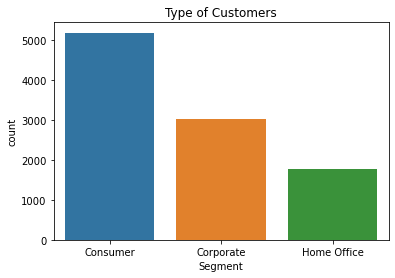

In [14]:
sns.countplot(x=dataset['Segment'])
plt.title("Type of Customers")
plt.show()

In [15]:
#Checking for the different sub-categories of the products sold in the store.
dataset['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

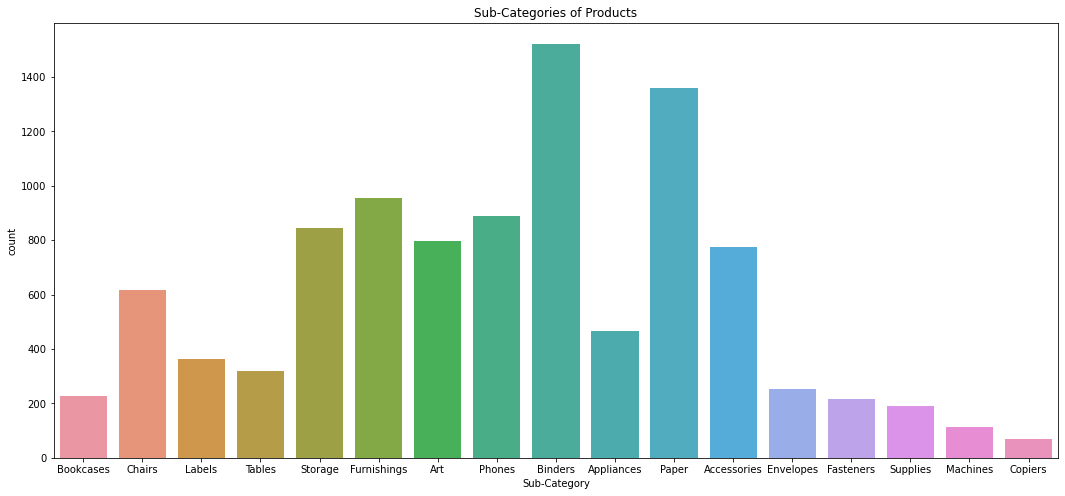

In [16]:
plt.figure(figsize=(18,8))
sns.countplot(x=dataset['Sub-Category'])
plt.title("Sub-Categories of Products")
plt.show()

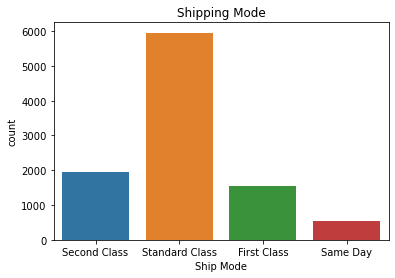

In [17]:
sns.countplot(x=dataset['Ship Mode'])
plt.title("Shipping Mode")
plt.show()

In [18]:
#State-wise dealings
state = dataset['State'].value_counts()
state.mean()

203.6122448979592

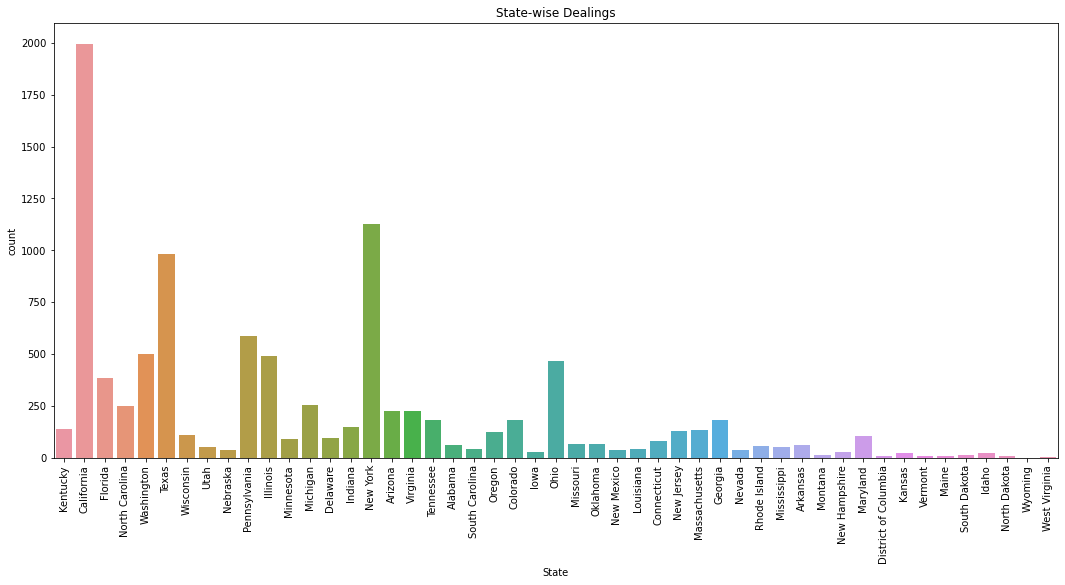

In [19]:
plt.figure(figsize=(18,8))
sns.countplot(x=dataset['State'])
plt.title("State-wise Dealings")
plt.xticks(rotation=90)
plt.show()

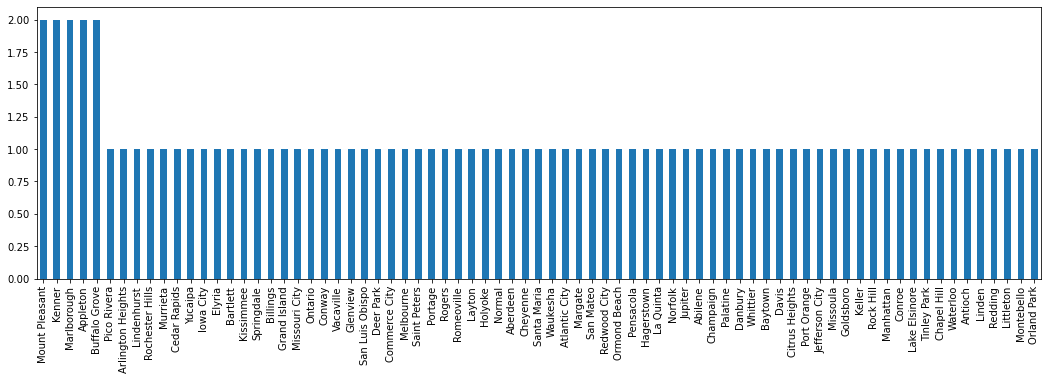

In [20]:
#City-wise dealings
city = dataset['City'].value_counts()
city = city.tail(75)
city.plot(kind='bar', figsize=(18,5))
plt.show()

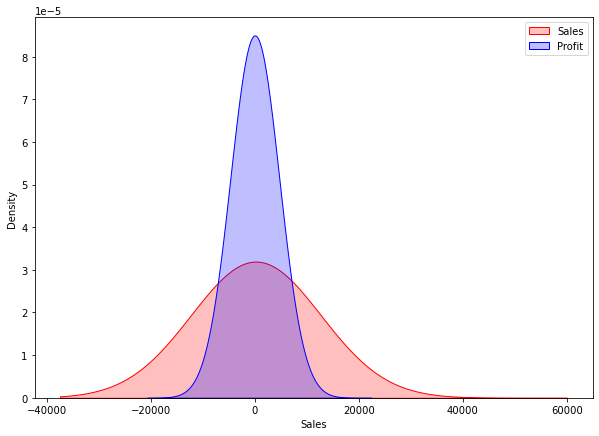

In [21]:
#KDE Plot
plt.figure(figsize=(10,7))
sns.kdeplot(dataset['Sales'], color='red', label='Sales', shade=True, bw_method=20)
sns.kdeplot(dataset['Profit'], color='blue', label='Profit', shade=True, bw_method=20)
plt.legend()
plt.show()

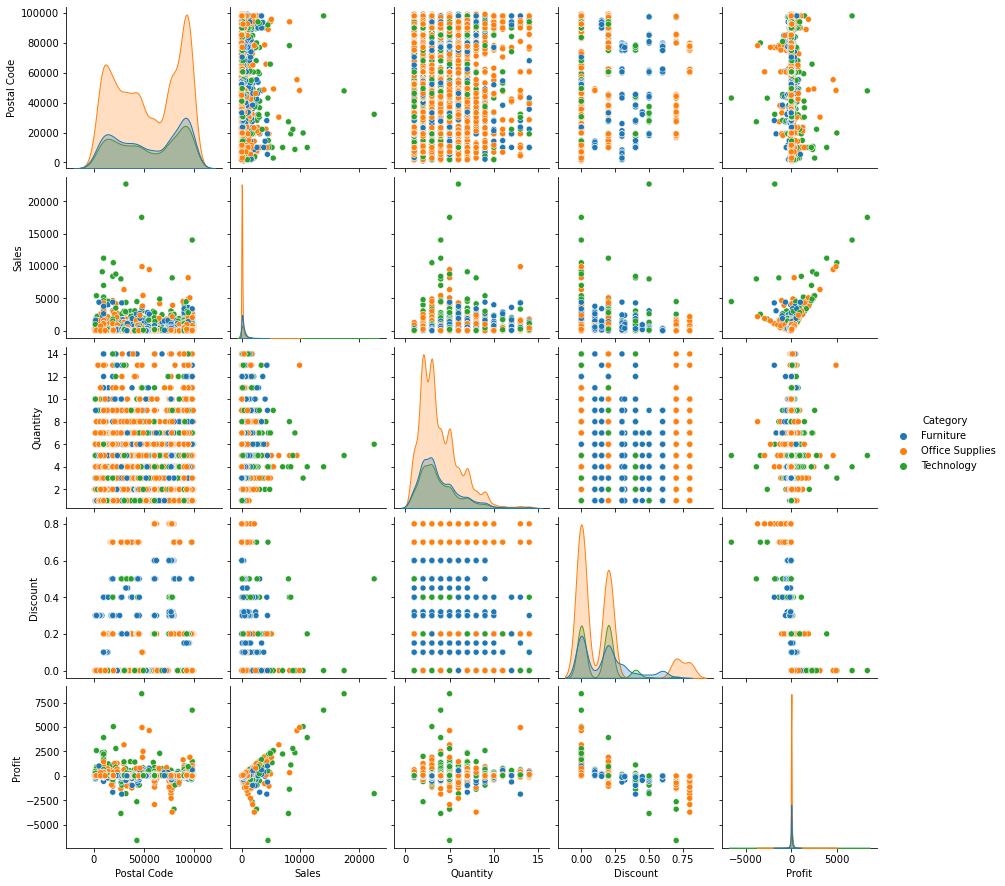

In [22]:
#Pairplot of the numeric data based on Category
sns.pairplot(dataset, hue='Category')
plt.show()

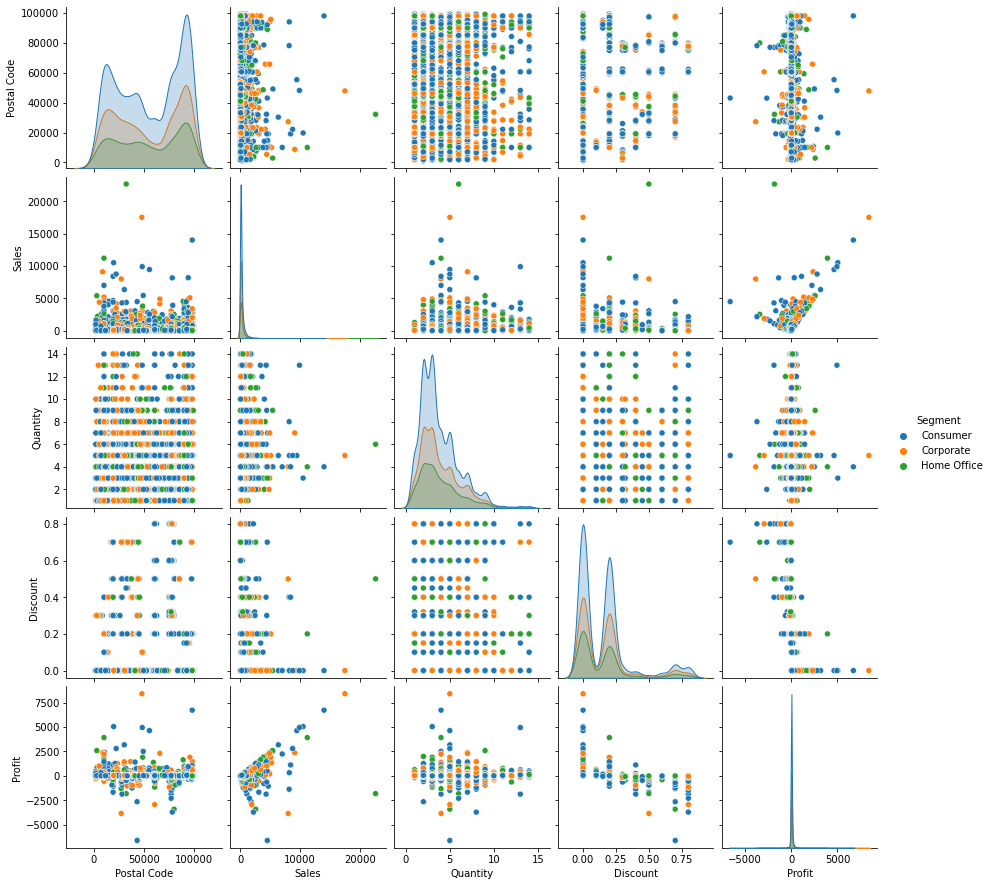

In [23]:
#Pairplot of the numeric data based on Segment
sns.pairplot(dataset, hue='Segment')
plt.show()

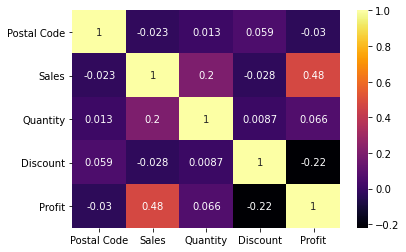

In [24]:
correlation = dataset.corr()
sns.heatmap(correlation, annot=True, cmap='inferno')
plt.show()

In [25]:
df = dataset.groupby(['Segment'])[['Quantity','Sales','Profit','Discount']].mean()
df

,Quantity,Sales,Profit,Discount
Segment,,,,
Consumer,3.761721,223.969279,25.855188,0.158308
Corporate,3.844444,234.185781,30.499164,0.158159
Home Office,3.784148,241.311234,33.883643,0.147178


In [26]:
df = dataset.groupby(['State'])[['Profit']].mean()
df.head()

,Profit
State,
Alabama,94.865989
Arizona,-15.303235
Arkansas,66.811452
California,38.241878
Colorado,-35.867351


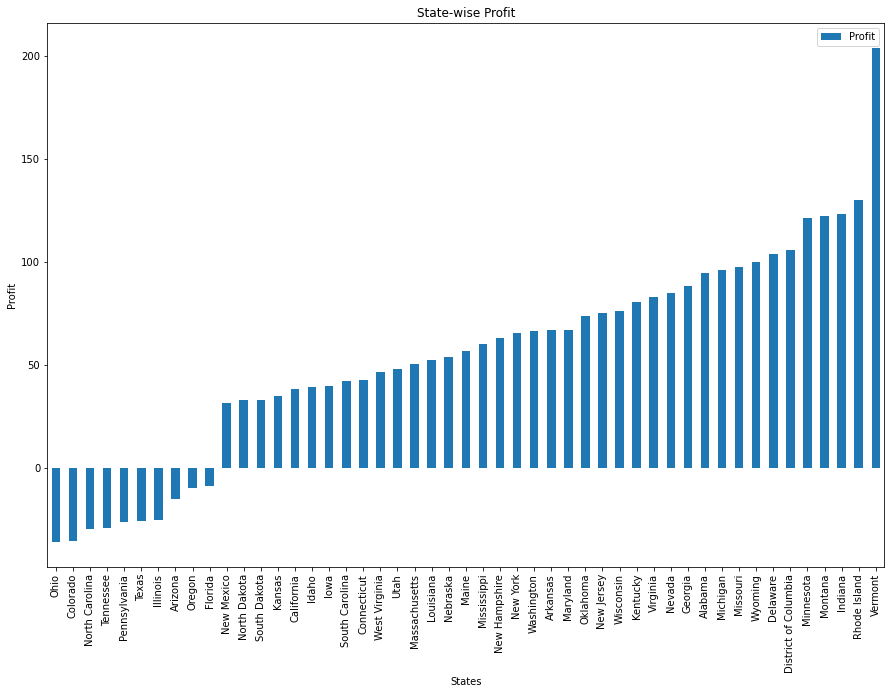

In [27]:
profit_state = df.sort_values('Profit')
profit_state[['Profit']].plot(kind='bar', figsize=(15,10))
plt.title("State-wise Profit")
plt.xlabel("States")
plt.ylabel("Profit")
plt.show()

In [28]:
df = dataset.groupby(['City'])[['Profit']].mean()
df.head()

,Profit
City,
Aberdeen,6.630000
Abilene,-3.758400
Akron,-8.887410
Albuquerque,45.292007
Alexandria,19.913644


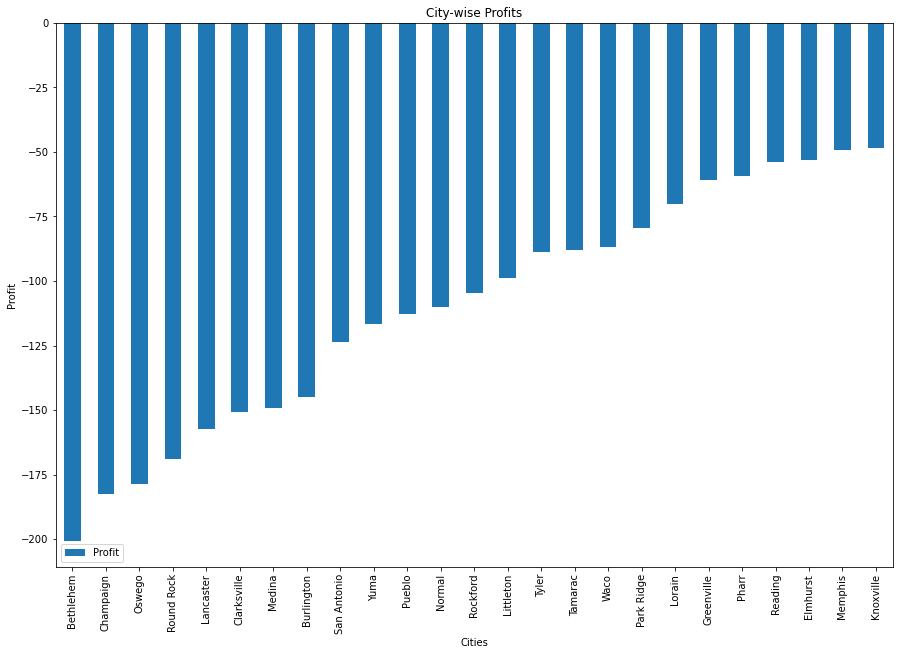

In [29]:
profit_city = df.sort_values('Profit').head(25)
profit_city[['Profit']].plot(kind='bar', figsize=(15,10))
plt.title("City-wise Profits")
plt.xlabel("Cities")
plt.ylabel("Profit")
plt.show()

In [30]:
df = dataset.groupby(['Category'])[['Profit']].mean()
df.head()

,Profit
Category,
Furniture,8.697740
Office Supplies,20.353403
Technology,78.752002


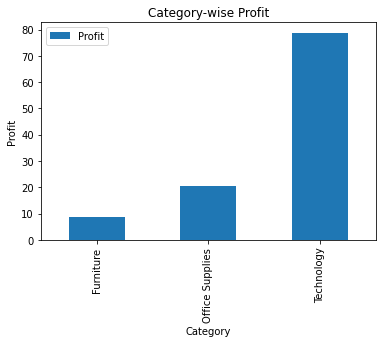

In [31]:
profit_category = df.sort_values('Profit')
profit_category[['Profit']].plot(kind='bar')
plt.title("Category-wise Profit")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.show()

In [32]:
df = dataset.groupby(['Sub-Category'])[['Profit']].mean()
df

,Profit
Sub-Category,
Accessories,54.111788
Appliances,38.922758
Art,8.207059
Binders,19.860710
Bookcases,-15.230509
Chairs,43.198582
Copiers,817.909190
Envelopes,27.418019
Fasteners,4.375660


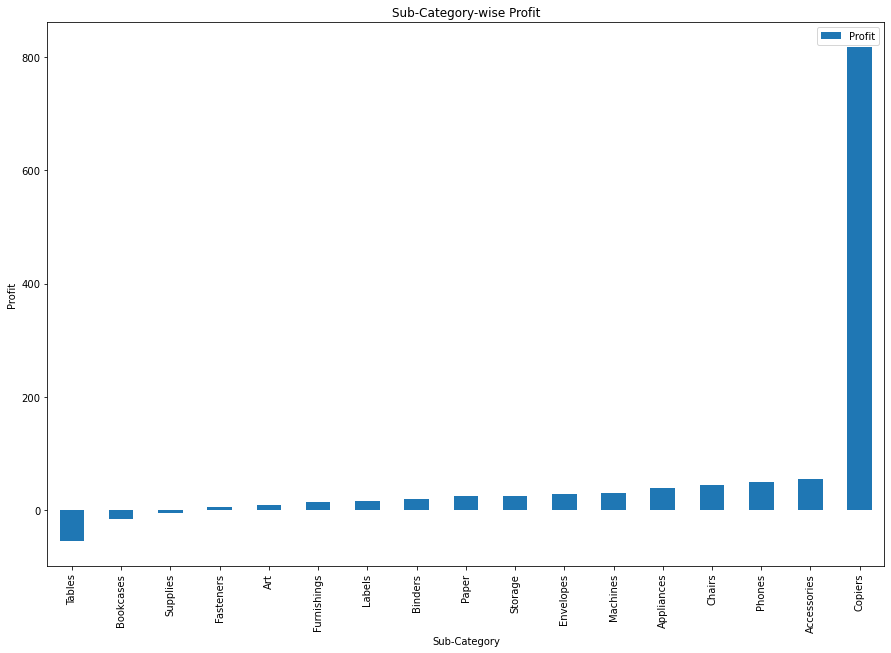

In [33]:
profit_sub_category = df.sort_values('Profit')
profit_sub_category[['Profit']].plot(kind='bar', figsize=(15,10))
plt.title("Sub-Category-wise Profit")
plt.xlabel("Sub-Category")
plt.ylabel("Profit")
plt.show()

In [34]:
df = dataset.groupby(['Category'])[['Sales']].mean()
df.head()

,Sales
Category,
Furniture,350.002981
Office Supplies,119.550107
Technology,452.709276


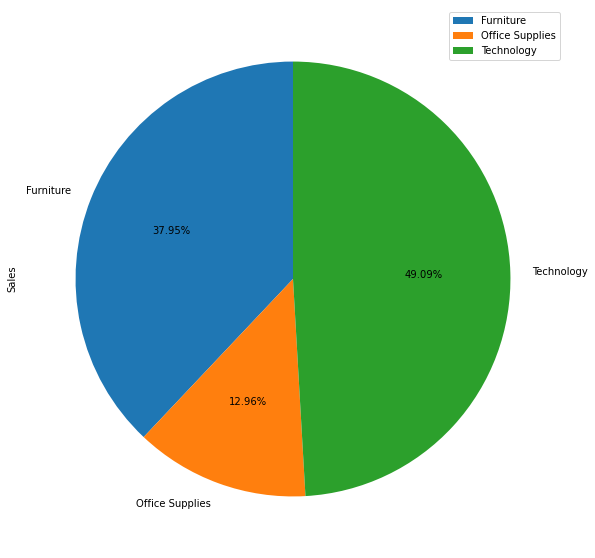

In [35]:
df.plot(kind='pie', subplots=True, startangle=90, autopct='%1.2f%%', figsize=(15,10))
plt.show()

## Analysis Report

### 1. The states Vemont, Maine, Wyoming, West Virginia have the lowest dealings.
### 2. The cities with the count as 1.0 have the lowest dealings.
### 3. State-wise Highest Loss = Ohio
### 4. City-wise Highest Loss = Bethlehem
### 5. Category-wise Lowest Profit = Furniture
### 6. Sub-Category-wise Highest Loss = Tables
### 7. Category-wise Lowest Sales = Office Supplies